# Titanic survival prediction

---
We will predict the survival of a person based on given set of attributes

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import warnings
import matplotlib.style as style 
# style.available


['seaborn-bright',
 'seaborn-talk',
 'bmh',
 'fivethirtyeight',
 'dark_background',
 'seaborn-deep',
 'classic',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-paper',
 'fast',
 'grayscale',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn',
 'seaborn-dark-palette',
 'tableau-colorblind10',
 'seaborn-dark',
 'seaborn-notebook',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-poster']

In [2]:
def numericValues(pdSeries, fillNullValues = True):
    itemNo = 0
    for item in pdSeries.unique():
        if pd.notna(item):
            pdSeries = pdSeries.replace(item,itemNo)
        elif fillNullValues:
            pdSeries = pdSeries.fillna(itemNo)
        itemNo+=1
    return pdSeries

In [3]:
trainData = pd.read_csv('./train.csv')
testData = pd.read_csv('./test.csv')
survivedData = pd.read_csv('./gender_submission.csv')

In [4]:
print("Shape of data : "+str(trainData.shape))
cols = list(trainData.columns)
print("columns : "+str(cols))

Shape of data : (891, 12)
columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


---
So we have a dataset with 12 columns and 891 rows. We will now test these 12 columns to check how much effect they have in output variable.

---

In [6]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
survivedGrouping = trainData.groupby('Sex')
male = survivedGrouping.get_group('male')
female = survivedGrouping.get_group('female')
# notSurvived.head()

Text(0.5, 1.0, 'Female survival')

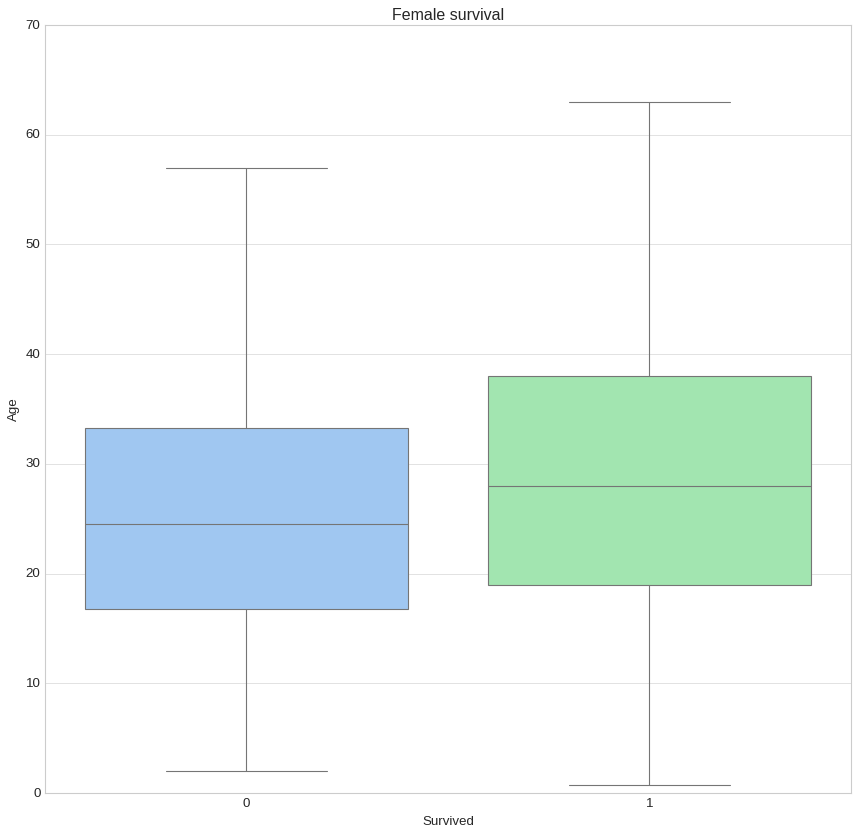

In [37]:

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [13,12]
sns.boxplot("Survived","Age", data=female)
plt.title('Female survival')

In [106]:
def plotBar(data, x, y, title, xlabel=None, ylabel=None):
    style.use('seaborn-whitegrid')
    plt.rcParams['figure.figsize'] = [13,12]
#     print("before bar")
    sns.barplot(x=x,y=y,data=data)
#     print("after bar")
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.title(title)

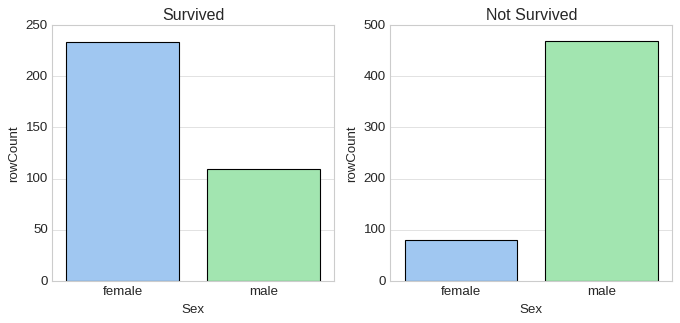

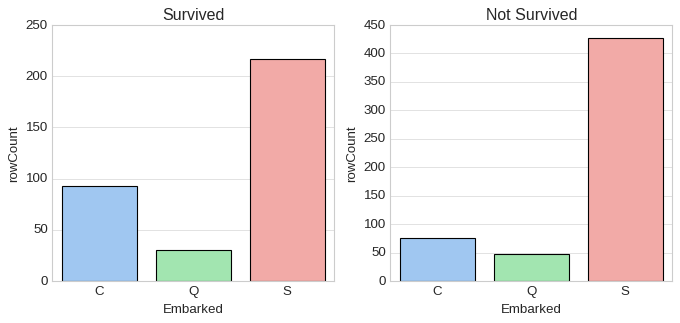

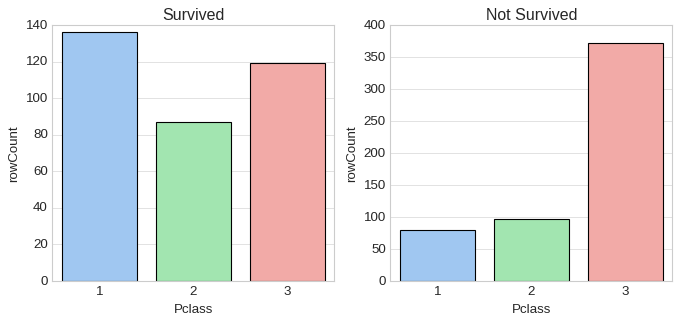

In [107]:
categoricalCols = ['Sex', 'Embarked', 'Pclass']
trainData['rowCount'] = np.ones(shape=trainData.shape[0])
for col in categoricalCols:
    barData = trainData[[col, 'Survived','rowCount']].groupby(['Survived',col], as_index = False).count()
    _ = plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    temp = barData[barData['Survived']==1][[col,'rowCount']]
    plotBar(temp, col, 'rowCount',title='Survived')
    temp = barData[barData['Survived']==0][[col,'rowCount']]
    plt.subplot(1,2,2)
    plotBar(data=temp, x=col, y='rowCount', title='Not Survived')

Now this provides a lot of information. For instance, we can easily infer from first graph that gender might have been a very good factor in determing whether you make it out of the ship alive. However we will get a good picture if instead of numbers, we work with percentages.

In [ ]:
def percentGroupwise(data, groupTotal, col):
    # data : data frame to be modified
    # groupTotal : groupwise total of data[col]
    # col : column to be modified
    temp = []
    for i in groupTotal.iterrows():
        data['col'] = 

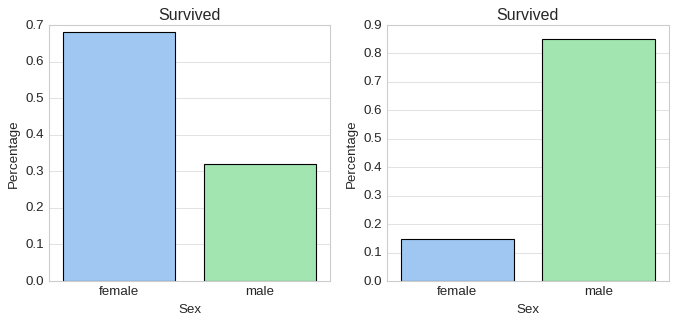

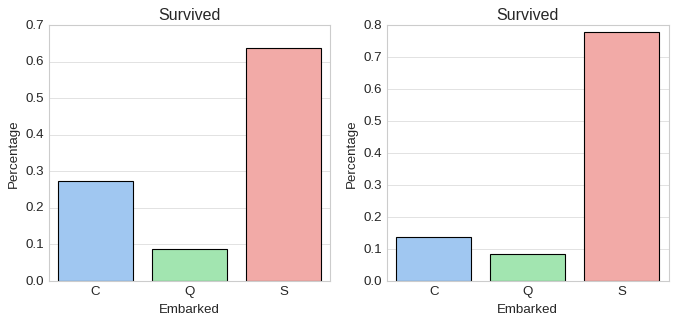

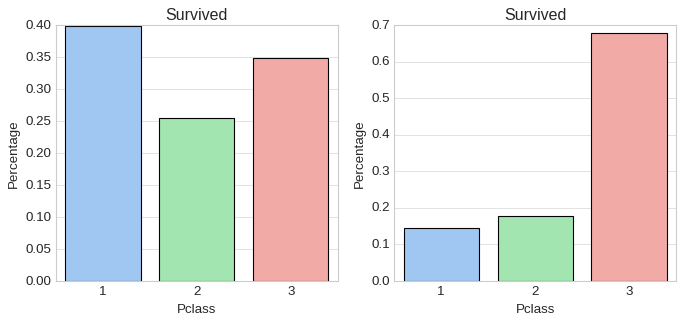

In [108]:
trainData['rowCount'] = np.ones(shape=trainData.shape[0])
for col in categoricalCols:
    barData = trainData[[col, 'Survived','rowCount']].groupby(['Survived',col], as_index = False).count()
    _ = plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    temp = barData[barData['Survived']==1][[col,'rowCount']]
    temp['percent'] = temp['rowCount']/sum(temp['rowCount'])
    plotBar(temp, col, 'percent',title='Survived', ylabel='Percentage')
    temp = barData[barData['Survived']==0][[col,'rowCount']]
    plt.subplot(1,2,2)
    temp['percent'] = temp['rowCount']/sum(temp['rowCount'])
    plotBar(temp, col, 'percent',title='Survived', ylabel='Percentage')

In [115]:
x=barData.groupby('Pclass',as_index=False).sum()

In [134]:
print(barData['rowCount'])
print(type(barData))
for s in barData:
    print((s))

0     80
1     97
2    372
3    136
4     87
5    119
Name: rowCount, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Survived
Pclass
rowCount
